# **Inicializando o Tabuleiro**

---



###Definindo o tabuleiro

In [ ]:
### **Definindo tabuleiro** ------------------------------------------------------------------------------------ >>
def initialize_board():
  ## Tabuleiro vazio:
  tabuleiroList = []
  for i in range(64):
    if i == 27 or i == 36:
      tabuleiroList.append(-1) #colocando peças BRANCAS na posição inicial do meio do tabuleiro
    elif i == 28 or i == 35:
      tabuleiroList.append(1) #colocando peças PRETAS na posição inicial do meio do tabuleiro
    else:
      tabuleiroList.append(0)
      
  tabuleiro = tuple(tabuleiroList)

  return tabuleiro


###Desenhando as peças no tabuleiro

In [ ]:
### **Desenhando as peças no tabuleiro** ------------------------------------------------------------------------------------ >>

def draw_piece(draw, cell, piece) :
    ## Convertendo linear para matricial
    line   = cell // 8
    column = cell  % 8

    ## Gerando as coordenadas
    x0 = column * 50
    x1 = (column+1)*50
    y0 = line*50
    y1 = (line+1)*50

    if piece == 1 :
        draw.ellipse([x0, y0, x1, y1], width=2, fill = "black")
    elif piece == -1 :
        draw.ellipse([x0, y0, x1, y1], width=2, fill = "white")




###Desenhando jogadas válidas no tabuleiro

In [ ]:
### **Desenhando jogadas válidas no tabuleiro** ------------------------------------------------------------------------------------ >>

def draw_piece_valid_moves(draw, cell) :
    ## Convertendo linear para matricial
    line   = cell // 8
    column = cell  % 8

    ## Gerando as coordenadas
    x0 = column * 50
    x1 = (column+1)*50
    y0 = line*50
    y1 = (line+1)*50

    draw.ellipse([x0, y0, x1, y1], width=1, outline = "silver")

###Desenhando números no tabuleiro

In [ ]:
### **Desenhando número no tabuleiro** ------------------------------------------------------------------------------------ >>

def draw_number(draw, cell) :
    ## Convertendo linear para matricial
    line   = cell // 8
    column = cell  % 8

    ## Gerando as coordenadas
    x = column * 50 + 20
    y = line*50 + 20

    text = str(cell)
    draw.text((x, y), text, fill = "darkgreen", align ="center")

###Desenhando tabuleiro junto com as jogadas válidas

In [ ]:
### **Desenhando tabuleiro junto com jogadas válidas** ------------------------------------------------------------------------------------ >>

## Importa biblioteca
from PIL import Image, ImageDraw

def draw_board(tab, turn, valids) :
    turno = turn
    ## Desenhamos um quadrado 400x400
    board = Image.new('RGB', (400, 400),  "green")
    ## Criamos uma espécie de canvas para desenhar
    draw  = ImageDraw.Draw(board)

    ## Desenhamos duas linhas horizontais
    x0 = 0
    y0 = 0
    x1 = 400
    y1 = 0

    for i in range(9):
      draw.line( (x0, y0, x1, y1), fill = "black", width = 1 ) 
      y0 += 50
      y1 = y0

    ## Desenhamos duas linhas verticais
    x0 = 0
    y0 = 0
    x1 = 0
    y1 = 400
    for i in range(9):
      draw.line( (x0, y0, x1, y1), fill = "black", width = 1 ) 
      x0 += 50
      x1 = x0

    for i in range(len(tab)) :
        ## Desenha a peça no tabuleiro
        if (tab[i]) :
            draw_piece(draw, i, tab[i])
        else:
          ## Desenha o número
          draw_number(draw, i)

    validMove = valids

    for i in range(len(validMove)) :
        draw_piece_valid_moves(draw, validMove[i])   

    return board


#**Construindo o jogo**

---



###Definindo as jogadas válidas

In [ ]:
### **Definindo Jogadas Válidas** ------------------------------------------------------------------------------------ >>

## Função que devolve as jogadas válidas
def get_valid_moves(tab, turn) :
    valids = []
    for i in range(len(tab)) :
        if tab[i] == turn:  
            ##Verificação da linha sentido direita 
            if i <= 61 and (i+1)%8!=0:
              if tab[i+1] == -(turn):
                for y in range(2,8):
                  if (i+y)%8==0:
                    break
                  elif tab[i+y] == 0:
                    valids.append(i+y)
                    break
                  elif tab[i+y] == turn:
                    break
            ##Verificação da linha sentido esquerda
            if i >= 2 and (i-1)%8!=7:
              if tab[i-1] == -(turn):
                for y in range(2,8):
                  if (i-y)%8==7:
                    break
                  elif tab[i-y] == 0:
                    valids.append(i-y)
                    break  
                  elif tab[i-y] == turn:
                    break   
            ##Verificação da coluna sentido baixo 
            if i <= 47:
              if tab[i+8] == -(turn):
                for y in range(16,57,8):
                  if (i+y) > 63:
                    break
                  if tab[i+y] == 0:
                    valids.append(i+y)
                    break
                  elif tab[i+y] == turn:
                    break
            ##Verificação da coluna sentido cima
            if i > 15:
              if tab[i-8] == -(turn):
                for y in range(16,57,8):
                  if (i-y) < 0:
                    break
                  if tab[i-y] == 0:
                    valids.append(i-y)
                    break
                  elif tab[i-y] == turn:
                    break
            ##Verificação da diagonal inferior direita 
            if i <= 45:
              if tab[i+9] == -(turn):
                for y in range(18,64,9):
                  if (i+y) > 63:
                    break
                  elif (i+y) % 8 == 0:
                    break
                  elif tab[i+y] == 0:
                    valids.append(i+y)
                    break
                  elif tab[i+y] == turn:
                    break
            ##Verificação da diagonal inferior esquerda
            if i <= 47:
              if tab[i+7] == -(turn):
                for y in range(14,50,7):
                  if (i+y) > 63:
                    break
                  elif (i+y) % 8 == 7:
                    break
                  elif tab[i+y] == 0:
                    valids.append(i+y)
                    break
                  elif tab[i+y] == turn:
                    break  
            ##Verificação da diagonal superior direita
            if i >= 16:
              if tab[i-7] == -(turn):
                for y in range(14,50,7):
                  if (i-y) < 0:
                    break
                  elif (i-y) % 8 == 0:
                    break
                  if tab[i-y] == 0:
                    valids.append(i-y)
                    break
                  elif tab[i-y] == turn:
                    break
            ##Verificação da diagonal superior esquerda
            if i >= 18:
              if tab[i-9] == -(turn):
                for y in range(18,64,9):
                  if (i-y) < 0:
                    break
                  elif (i-y) % 8 == 7:
                    break
                  elif tab[i-y] == 0:
                    valids.append(i-y)
                    break
                  elif tab[i-y] == turn:
                    break 
    return sorted(set(valids))  

###Definindo o ganhador da partida

In [ ]:
### **Definindo ganhador** ------------------------------------------------------------------------------------ >>

## Código que devolve o jogador vencedor, 
## ou zero em caso de não ter um vencedor
## definido
def winner(tab) :
    somas0 = tab.count(0)
    somas1 = tab.count(1)
    somas2 = tab.count(-1)
    if (somas2 > somas1) and (somas0 == 0) : #Pecas BRANCAS ganham quando forem maioria, e quando não houverem espacos vazios
        return -1
    elif (somas2 < somas1) and (somas0 == 0): #Pecas PRETAS ganham quando forem maioria, e quando não houverem espacos vazios
        return 1
    else:
        return 0    

###Construindo um player que realiza jogadas ao acaso

In [ ]:
### **Jogador bobinho que faz jogadas ao acaso** ------------------------------------------------------------- >>

import random
def player(tab, turn, valids) :
    valids = get_valid_moves(tab, turn)
    if valids :
        return (turn, random.choice(valids) )

###Definindo um jogador humano

In [ ]:
### **Jogador humano** ------------------------------------------------------------------------------------ >>

def human_player(tab, turn, valids) : 
    print("\n")     
    ## Desenha tabuleiro antes do jogador humano 
    board = draw_board( tab, turn, valids)
    display(board)  
    print("Jogadas válidas: %s" % (valids))
    move = int(input())

    while not move in valids : 
        print("Jogadas válidos: %s" % (valids))
        move = int(input())
    return turn, move

###Definindo função que gira as peças

In [ ]:
# **Função que vira as peças** ------------------------------------------------------------------------------------ >>

def flip_pieces( tab, piece, pos ) : 
  for i in range(len(tab)):
    if i == pos:            
      contador = 1
      ##linha sentido direita
      if i <= 61 and (i+1)%8!=7:
        if tab[i+1] == -(piece):
          for y in range(1,8):
            if (y+i)%8 == 0:
              break
            elif tab[y+i] == -(piece):
              contador = contador + 1
            elif tab[i+y] == piece:
              for z in range(1,contador):
                tab[i+z] = piece
              break
            
      contador = 1
      ##linha sentido esquerda
      if i >= 2 and (i-1)%8!=0:
        if tab[i-1] == -(piece):
          for y in range(1,8):
            if (i-y)%8 == 7:
              break
            if tab[i-y] == -(piece):
              contador = contador + 1
            elif tab[i-y] == piece:
              for z in range(1,contador):
                tab[i-z] = piece
              break 

      contador = 1
      ##coluna sentido baixo
      if i <= 47:
        if tab[i+8] == -(piece):
          for y in range(8,49,8):
            if (i+y) > 63:
              break
            if tab[y+i] == -(piece):
              contador = contador + 8
            elif tab[i+y] == piece:
              for z in range(8,contador,8):   
                tab[i+z] = piece
              break

      contador = 1
      ##coluna sentido cima
      if i > 15:
        if tab[i-8] == -(piece):
          for y in range(8,49,8):
            if (i-y) < 0:
              break
            if tab[i-y] == -(piece):
              contador = contador + 8
            elif tab[i-y] == piece:
              for z in range(8,contador,8):
                tab[i-z] = piece
              break   

      contador = 1
      ##diagonal inferior direita
      if i <= 45:
        if tab[i+9] == -(piece):
          for y in range(9,64,9):
            if (i+y) > 63:
                break
            if tab[i+y] == -(piece):
              contador = contador + 9
            elif tab[i+y] == piece:
              for z in range(9,contador,9):
                tab[i+z] = piece
              break

      contador = 1
      ##diagonal inferior esquerda
      if i <= 47:
        if tab[i+7] == -(piece):
          for y in range(7,50,7):
            if (i+y) > 63:
              break
            if tab[i+y] == -(piece):
              contador = contador + 7
            elif tab[i+y] == piece:
              for z in range(7,contador,7):
                tab[i+z] = piece
              break

      contador = 1
      ##diagonal superior direita
      if i >= 16:
        if tab[i-7] == -(piece):
          for y in range(7,50,7):
            if (i-y) < 0:
              break
            if tab[i-y] == -(piece):
              contador = contador + 7
            elif tab[i-y] == piece:
              for z in range(7,contador,7):
                tab[i-z] = piece
              break

      contador = 1
      ##diagonal superior esquerda
      if i >= 18:
        if tab[i-9] == -(piece):
          for y in range(9,64,9):
            if (i-y) < 0:
              break
            elif tab[i-y] == -(piece):
              contador = contador + 9
            elif tab[i-y] == piece:
              for z in range(9,contador,9):
                tab[i-z] = piece
              break
  return tab

###Definindo função que gerencia uma partida

In [ ]:
# **Função que gerencia o jogo** ------------------------------------------------------------------------------------ >>

def game(player1, player2) :
    ## Inicialização
    playgame = False
    turn   = 1
    result = 0 
    tabuleiro = initialize_board()

    ## Lista que guardará o histórico
    history = [] 

    ## Enquanto houverem jogadas, pedimos para o jogador vez prosseguir
    while get_valid_moves(tabuleiro, turn):
        ## Verifica jogadas válidas
        validMoves  = get_valid_moves(tabuleiro, turn)
    
        ## para ver os passo a passo das jogadas com mais detalhes, 
        ## mostre o tabuleiro aqui
        ## board = draw_board( tabuleiro, turn, validMoves)
        ## display(board)
    
        ## Pedindo uma jogada ao jogador da vez.
        piece, pos = None, None
        if turn == 1 :
            piece, pos = player1(tabuleiro, turn, validMoves)    
        else : 
            piece, pos = player2(tabuleiro, turn, validMoves)
            #print("\n")
            #print("O bobinho jogou na posição %s\n" % (pos))
        
        # Colocando a peça no tabuleiro
        ltab = list(tabuleiro)

        ## EU queria deixar assim >> 
        ltab = flip_pieces( ltab, piece, pos )
        
        ##Flippando as peças

        ltab[pos] = piece
       
        tabuleiro = tuple(ltab)

        ## Adicionando tabuleiro no histórico
        history.append(tabuleiro)

        ## Verificando se alguém ganhou
        result = winner(tabuleiro)

        ## Trocando a vez de jogar
        turn = -turn
    
    return result, history


###Realizando um jogo entre um humano e um jogador ao acaso

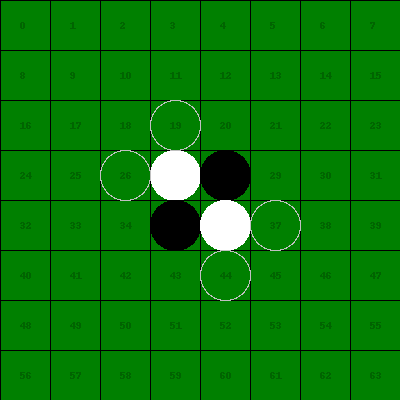

Jogadas válidas: [19, 26, 37, 44]
19




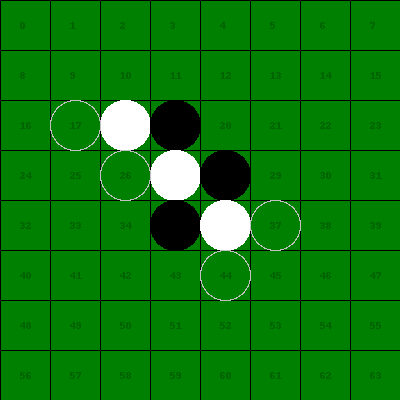

Jogadas válidas: [17, 26, 37, 44]
17




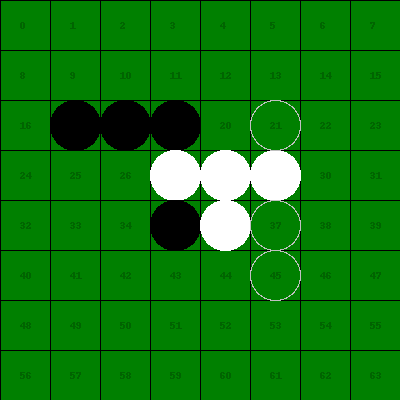

Jogadas válidas: [21, 37, 45]
45




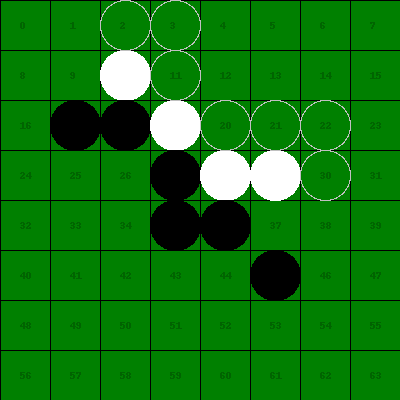

Jogadas válidas: [2, 3, 11, 20, 21, 22, 30]
2




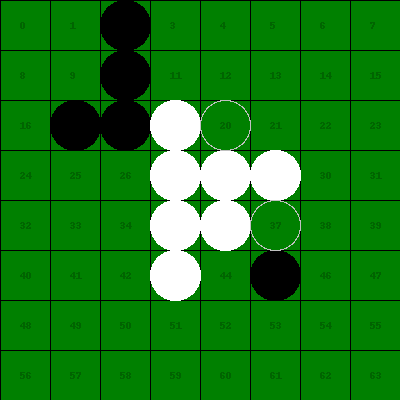

Jogadas válidas: [20, 37]
20




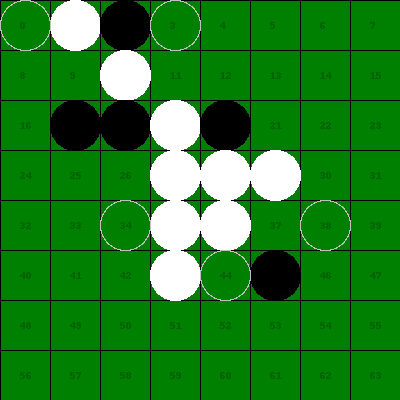

Jogadas válidas: [0, 3, 34, 38, 44]
0




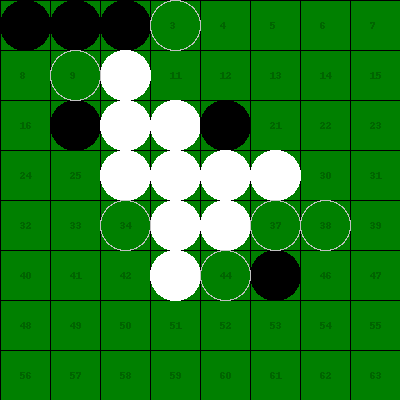

Jogadas válidas: [3, 9, 34, 37, 38, 44]
9




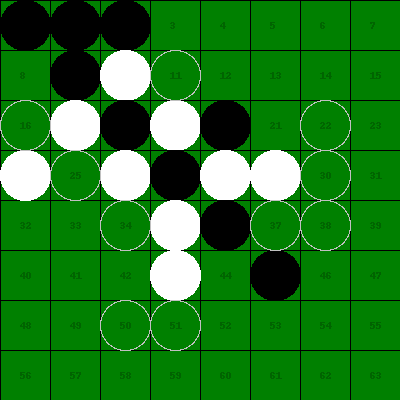

Jogadas válidas: [11, 16, 22, 25, 30, 34, 37, 38, 50, 51]
16




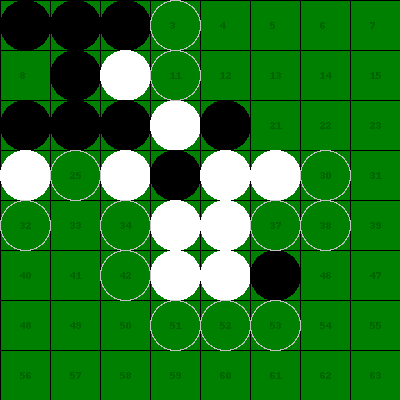

Jogadas válidas: [3, 11, 25, 30, 32, 34, 37, 38, 42, 51, 52, 53]
32




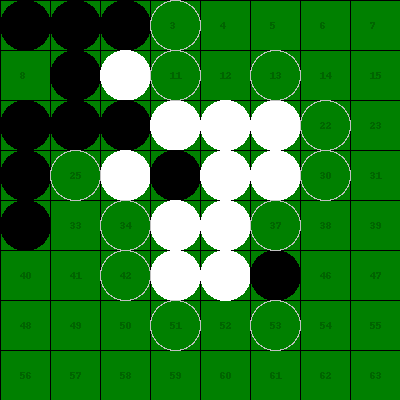

Jogadas válidas: [3, 11, 13, 22, 25, 30, 34, 37, 42, 51, 53]
25




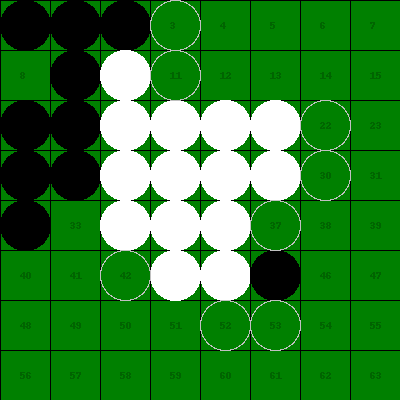

Jogadas válidas: [3, 11, 22, 30, 37, 42, 52, 53]
42




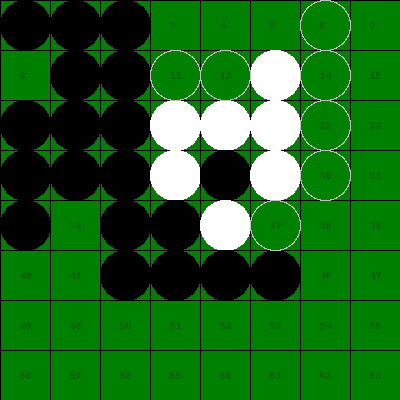

Jogadas válidas: [6, 11, 12, 14, 22, 30, 37]
37




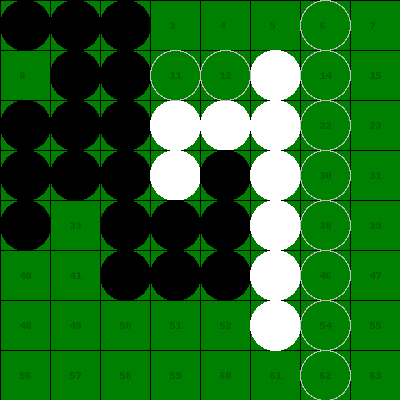

Jogadas válidas: [6, 11, 12, 14, 22, 30, 38, 46, 54, 62]
22




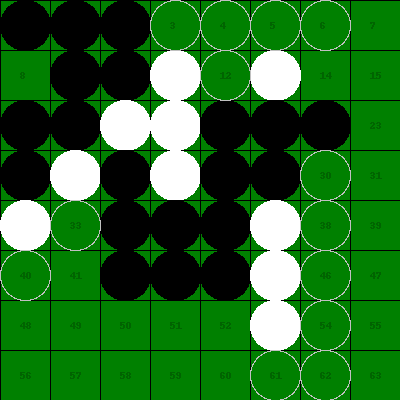

Jogadas válidas: [3, 4, 5, 6, 12, 30, 33, 38, 40, 46, 54, 61, 62]
3




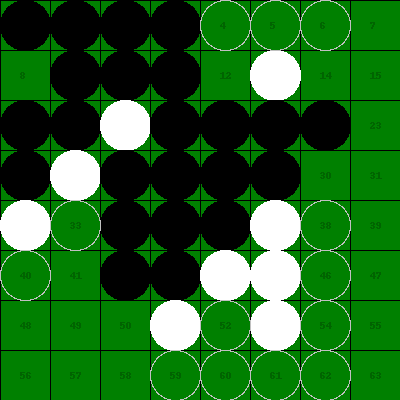

Jogadas válidas: [4, 5, 6, 33, 38, 40, 46, 52, 54, 59, 60, 61, 62]
5




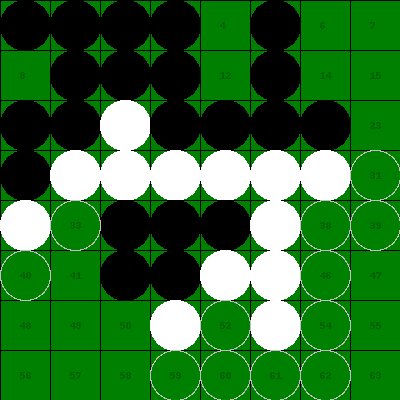

Jogadas válidas: [31, 33, 38, 39, 40, 46, 52, 54, 59, 60, 61, 62]
62




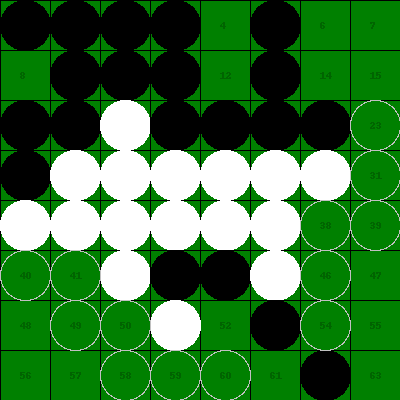

Jogadas válidas: [23, 31, 38, 39, 40, 41, 46, 49, 50, 54, 58, 59, 60]
38




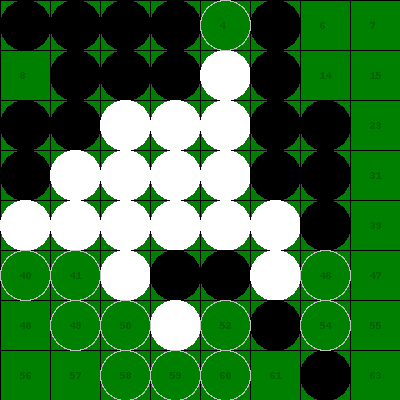

Jogadas válidas: [4, 40, 41, 46, 49, 50, 52, 54, 58, 59, 60]
41




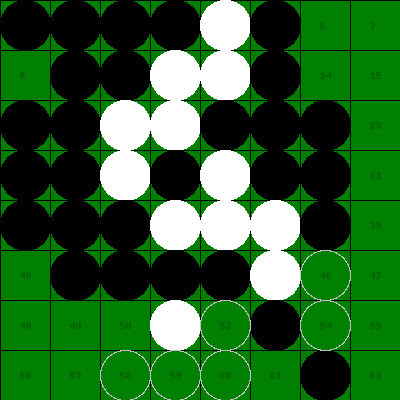

Jogadas válidas: [46, 52, 54, 58, 59, 60]
52




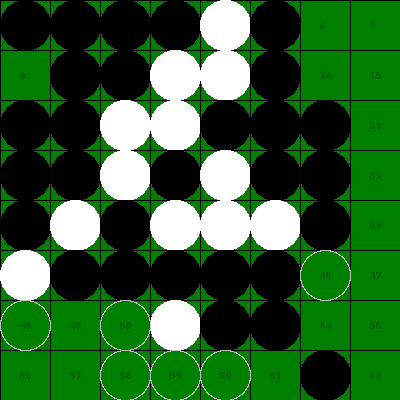

Jogadas válidas: [46, 48, 50, 58, 59, 60]
46




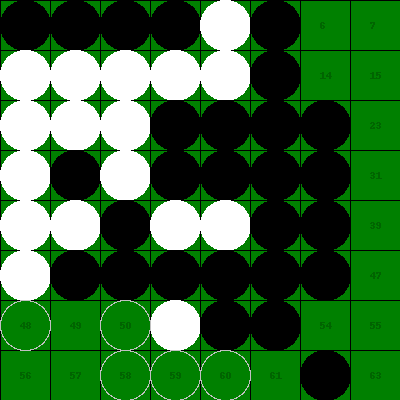

Jogadas válidas: [48, 50, 58, 59, 60]
48




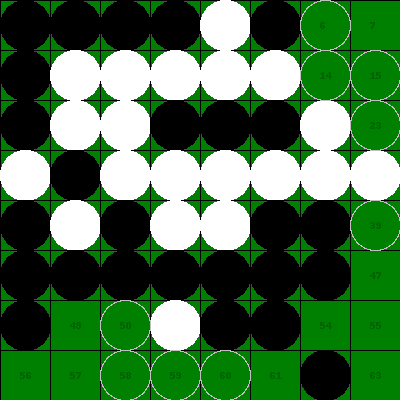

Jogadas válidas: [6, 14, 15, 23, 39, 50, 58, 59, 60]
58




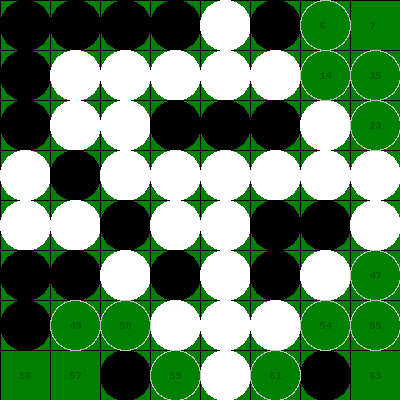

Jogadas válidas: [6, 14, 15, 23, 47, 49, 50, 54, 55, 59, 61]
14




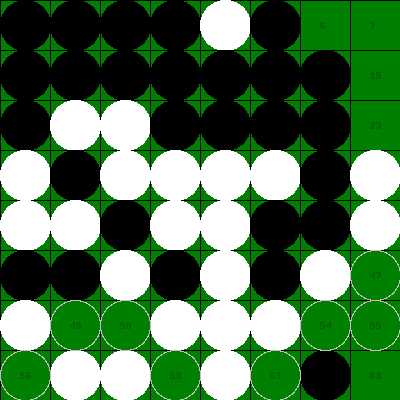

Jogadas válidas: [47, 49, 50, 54, 55, 56, 59, 61]
56




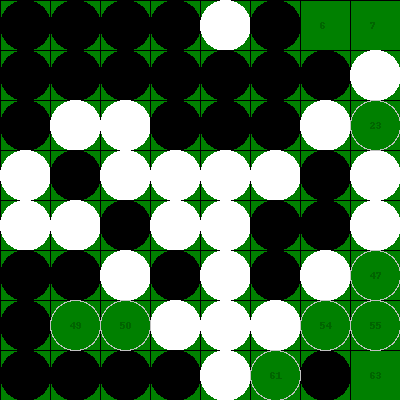

Jogadas válidas: [23, 47, 49, 50, 54, 55, 61]
50




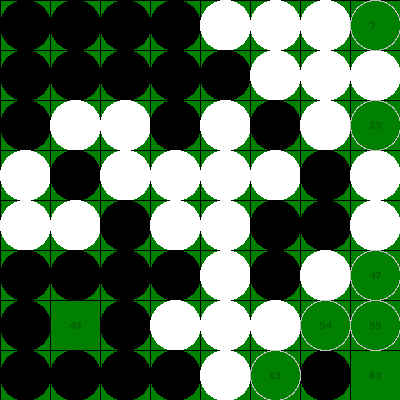

Jogadas válidas: [7, 23, 47, 54, 55, 61]
61




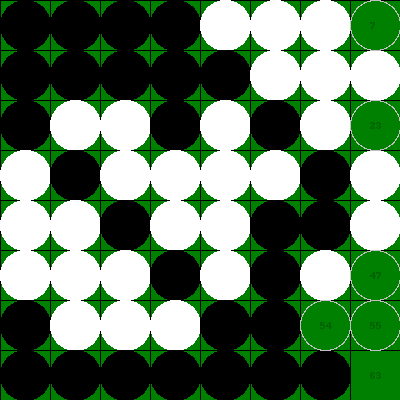

Jogadas válidas: [7, 23, 47, 54, 55]
47




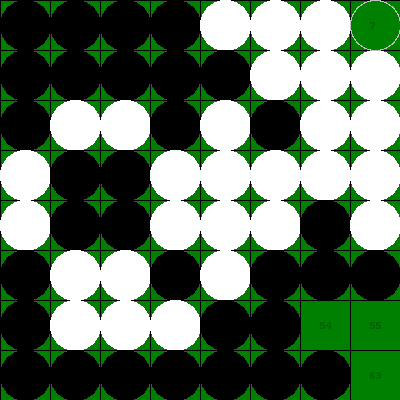

Jogadas válidas: [7]
7




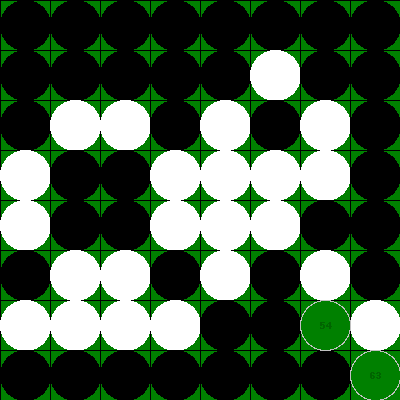

Jogadas válidas: [54, 63]
54
#========================================#

|      CONGRATULATIONS, YOU WIN          |

#========================================#



In [ ]:
result, history = game(human_player, player)

if result == 1 :
  print("#========================================#\n")
  print("|      CONGRATULATIONS, YOU WIN          |\n")
  print("#========================================#\n")

elif result == -1 :
  print("#========================================#\n")
  print("|        GAME OVER... TRAIN MORE         |\n")
  print("#========================================#\n")
else:
  print("#========================================#\n")
  print("|            THAT'S A DRAW!!             |\n")
  print("#========================================#\n")

###Campeonato com 1000 partidas

In [ ]:
def campeonato(player1, player2, num_games = 1000) :
    results = [0,0,0]
    for i in range(num_games) :
        result, x = game(player1, player2)
        results[result] += 1
    return tuple(results)
campeonato(player,player)

(348, 341, 311)

# **Jogo contra bot um pouco mais inteligente**

---



###Realizando um campeonato com algum conhecimento

In [ ]:
## Função campeonato_with_knowledge ------------------------------------------------------------->>

def campeonato_with_knowledge(player1, player2, num_games = 1000, knowledge = {}) :
    results = [0,0,0]

    for i in range(num_games) :
        result, history = game(player1, player2)
        results[result] += 1

        ## Adicionando as jogadas no histórico
        for tab in history :
            if not tab in knowledge :
                knowledge[tab] = [0, 0, 0]
            knowledge[tab][result] += 1

    return tuple(results), knowledge

## Gerando jogos e guardando em knowledge
results, knowledge = campeonato_with_knowledge(player, player)
print(results)

(321, 361, 318)


###Criando um player com algum conhecimento

In [ ]:
## Criando bot com knowledge ------------------------------------------------------------->>

def create_player(knowledge) :
    def player(tab, turn, valid_moves) :
        ## Computando scores de cada move
        scores = []
        for move in valid_moves :
            ## Colocando a peça no tabuleiro
            ltab = list(tab)
            ltab[move] = turn

            ## Computando score
            a,b,c = knowledge.get( tuple(ltab), (1,0,0) )
            scores.append(  turn*(b-c)/(a+b+c) )

        
        chosen = valid_moves[ scores.index( max(scores) )  ] 
        return (turn, chosen )
    return player

player2 = create_player(knowledge)

###Realizando um jogo entre um humano e um jogador com algum conhecimento



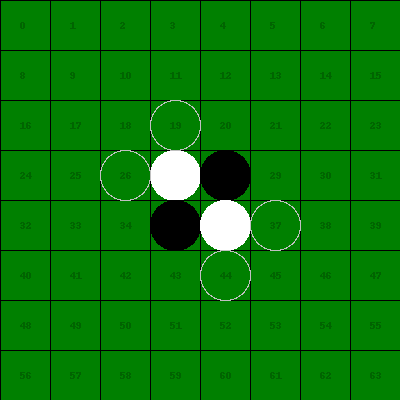

Jogadas válidas: [19, 26, 37, 44]
19




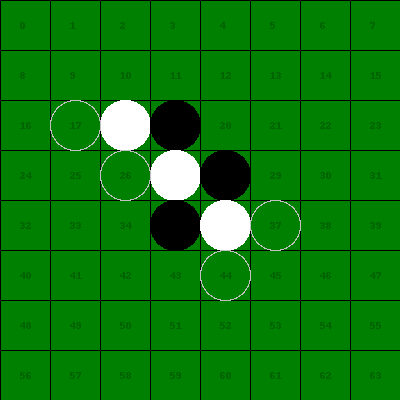

Jogadas válidas: [17, 26, 37, 44]
17




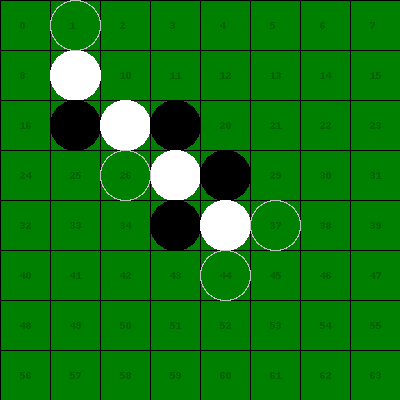

Jogadas válidas: [1, 26, 37, 44]
1




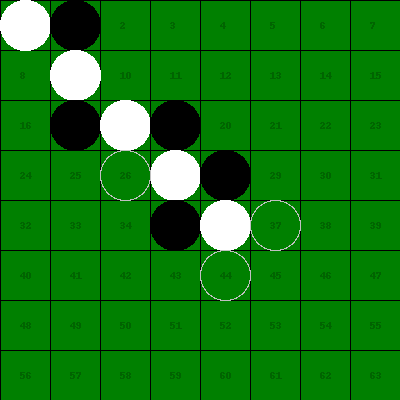

Jogadas válidas: [26, 37, 44]
26




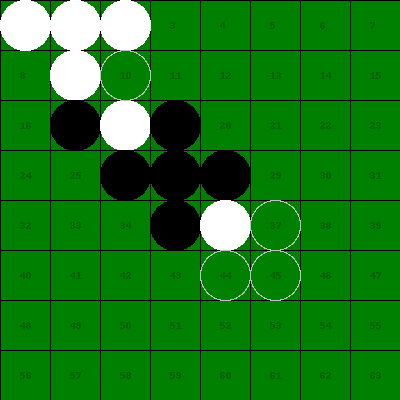

Jogadas válidas: [10, 37, 44, 45]
37




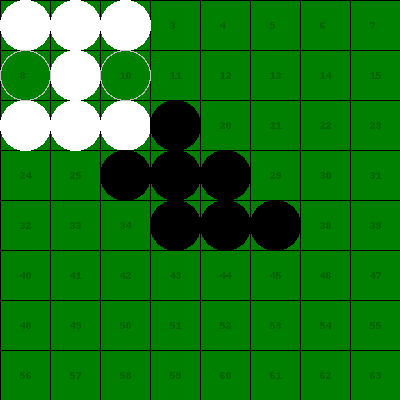

Jogadas válidas: [8, 10]
8




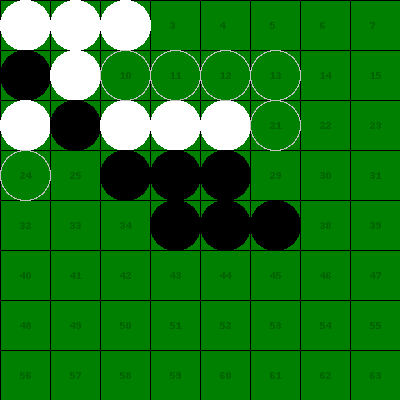

Jogadas válidas: [10, 11, 12, 13, 21, 24]
12




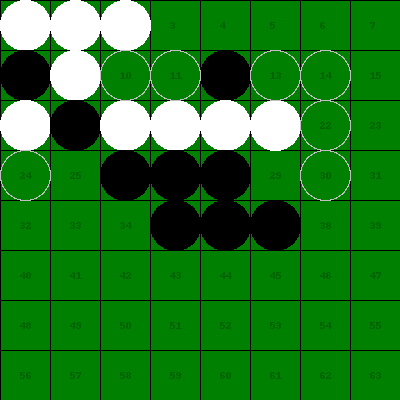

Jogadas válidas: [10, 11, 13, 14, 22, 24, 30]
22




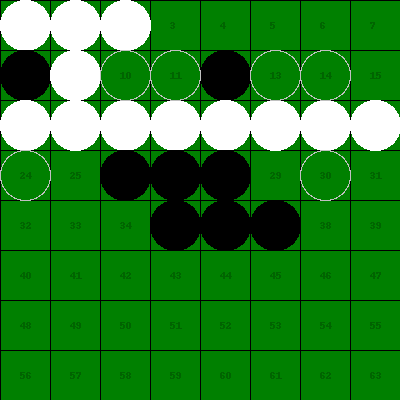

Jogadas válidas: [10, 11, 13, 14, 24, 30]
10




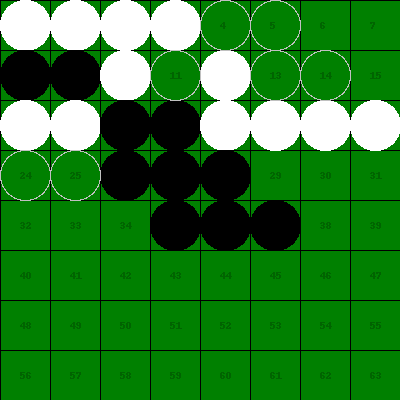

Jogadas válidas: [4, 5, 11, 13, 14, 24, 25]
13




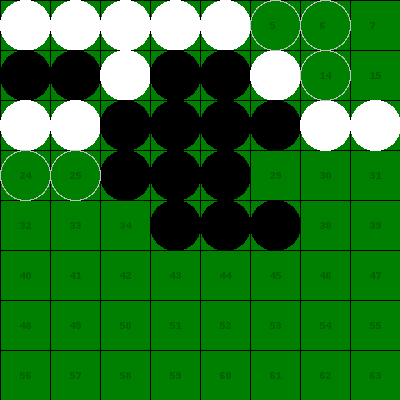

Jogadas válidas: [5, 6, 14, 24, 25]
25




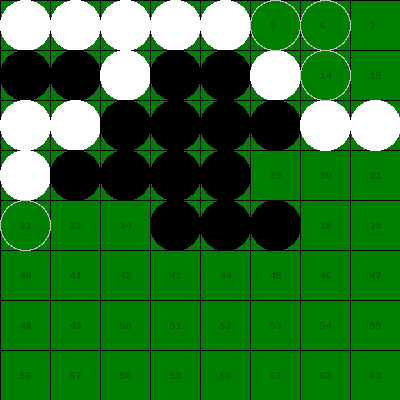

Jogadas válidas: [5, 6, 14, 32]
32




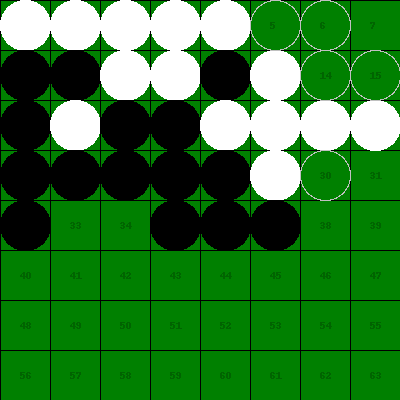

Jogadas válidas: [5, 6, 14, 15, 30]
30




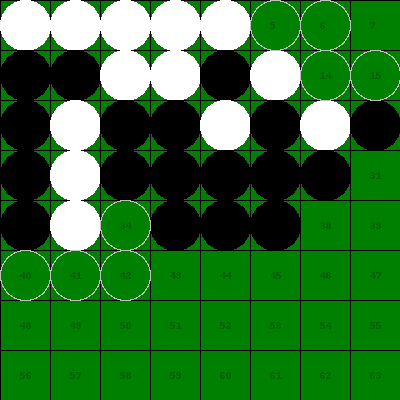

Jogadas válidas: [5, 6, 14, 15, 34, 40, 41, 42]
34




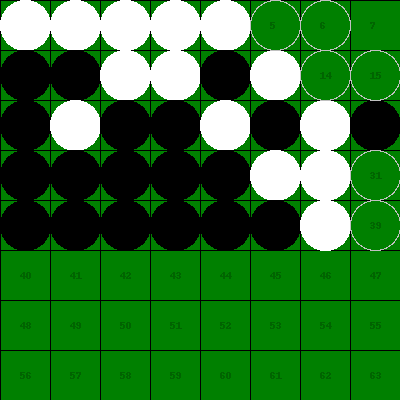

Jogadas válidas: [5, 6, 14, 15, 31, 39]
39




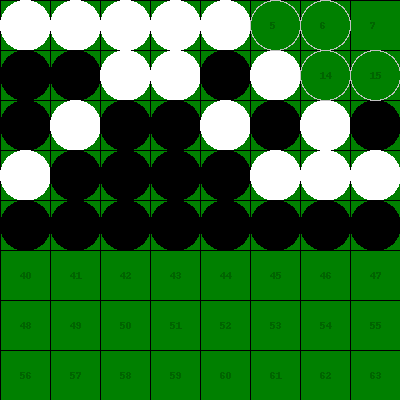

Jogadas válidas: [5, 6, 14, 15]
14




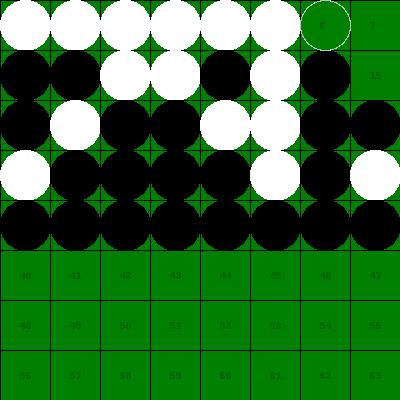

Jogadas válidas: [6]
6




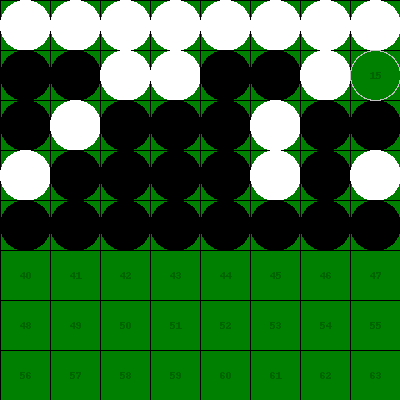

Jogadas válidas: [15]
15




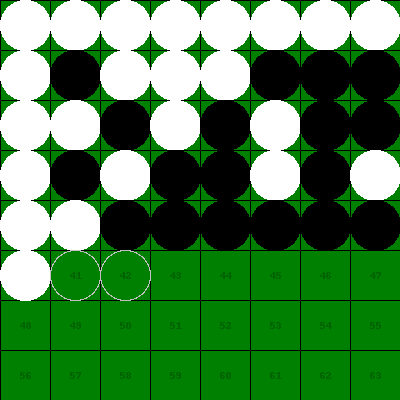

Jogadas válidas: [41, 42]
41




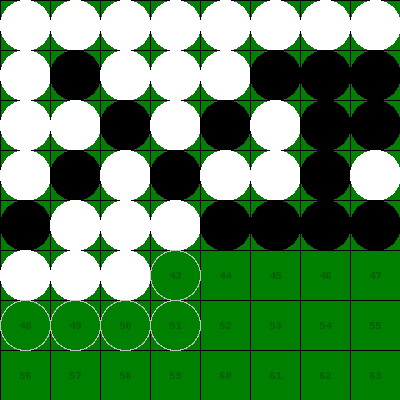

Jogadas válidas: [43, 48, 49, 50, 51]
49




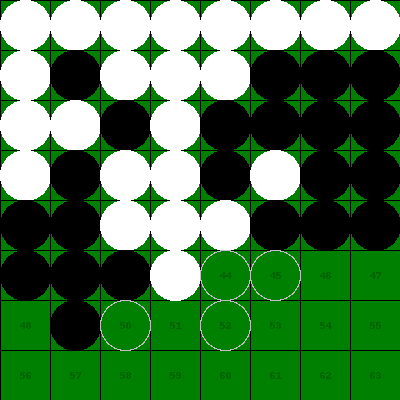

Jogadas válidas: [44, 45, 50, 52]
44




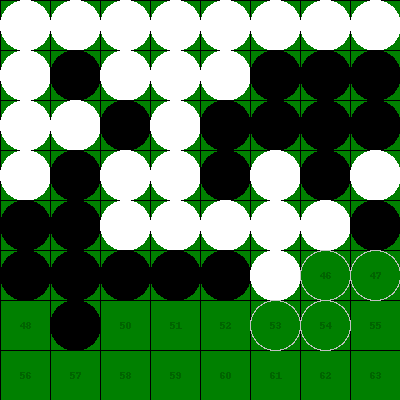

Jogadas válidas: [46, 47, 53, 54]
53




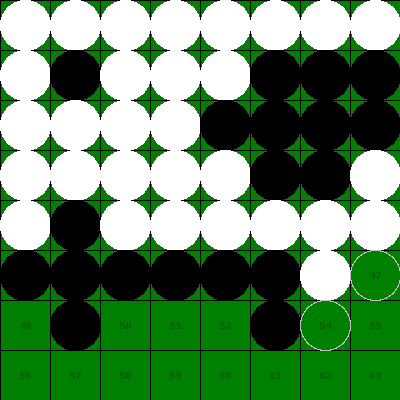

Jogadas válidas: [47, 54]
47




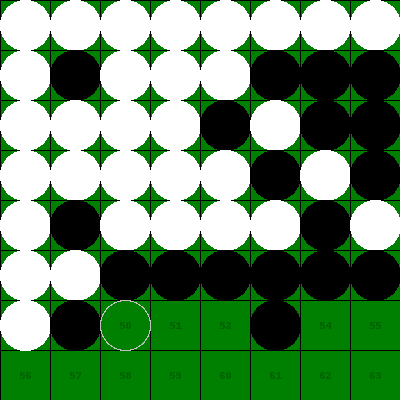

Jogadas válidas: [50]
50




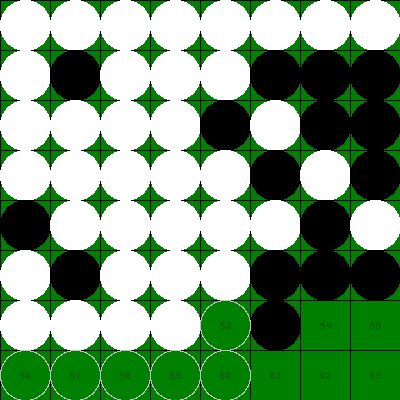

Jogadas válidas: [52, 56, 57, 58, 59, 60]
52




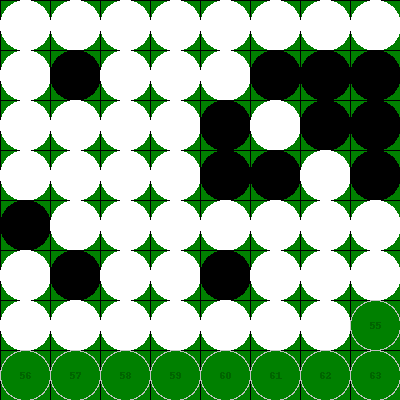

Jogadas válidas: [55, 56, 57, 58, 59, 60, 61, 62, 63]
55




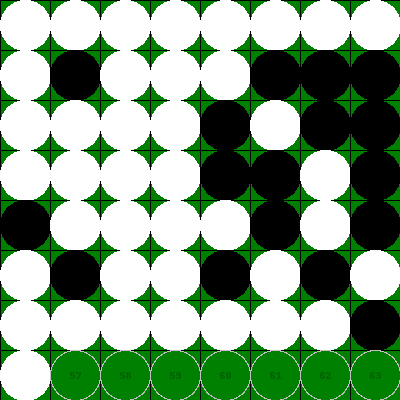

Jogadas válidas: [57, 58, 59, 60, 61, 62, 63]
57




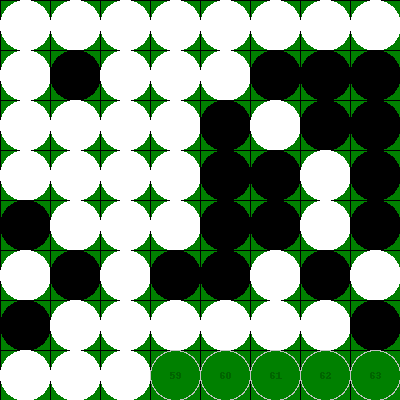

Jogadas válidas: [59, 60, 61, 62, 63]
59




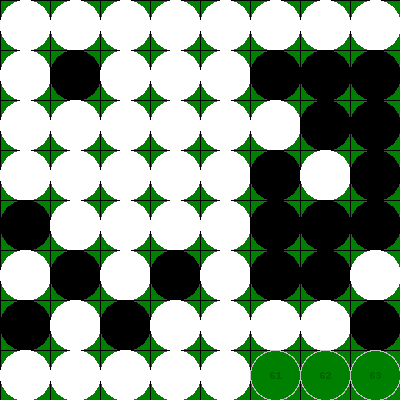

Jogadas válidas: [61, 62, 63]
61




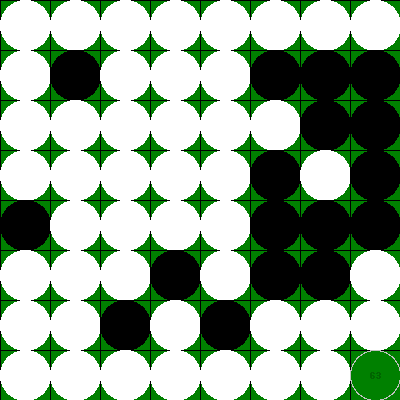

Jogadas válidas: [63]
63
#========================================#

|        GAME OVER... TRAIN MORE         |

#========================================#



In [ ]:
result, history = game(human_player, player2)

if result == 1 :
  print("#========================================#\n")
  print("|      CONGRATULATIONS, YOU WIN          |\n")
  print("#========================================#\n")

else :
  print("#========================================#\n")
  print("|        GAME OVER... TRAIN MORE         |\n")
  print("#========================================#\n")

# **Monte Carlo**

---



### Construindo um jogador que selecione os melhores movimentos



In [ ]:
def generate_rl_player(state_values, epsilon) :
  def player(tab, turn, valid_moves) :
    valid_moves = get_valid_moves(tab,turn)

    epsilon_random = random.random()
    if epsilon_random < epsilon :        
      return turn, random.choice(valid_moves)
    else :       
      ## A nossa política será fazer o movimento de acordo com os state_values.
      ## Escolheremos um dos melhores movimentos. Se turn = 1, significa maximizar 
      ## os state_values, caso contrário seria minimizar.
      scores = []
      for move in valid_moves :
        next_state = list(tab)
        next_state[move] = turn

        ## Vejam que estamos inicializando com zero.
        scores.append(state_values.get(tuple(next_state), 0))
      
      ## Analisando qual o best score de um tabuleiro.

      best_score = None
      if (turn == 1) :
          best_score = max(scores)
      else :
          best_score = min(scores)
          

      ## Selecionando quais as jogadas de melhor score. Em caso de empate,
      ## escolheremos ao acaso.
      best_moves = []
      for i in range(len(scores)) :  
        if scores[i] == best_score :
          best_moves.append(valid_moves[i])
          
      ## retornando um dos melhores movimentos
      return turn, random.choice(best_moves)
  return player

## Recompensando Tabuleiros

> A partir da nossa função *winner*, que definimos quem foi o vencedor daquela partida, definimos uma simples recompensa quando aquele player sai vitorioso naquele tabuleiro


In [ ]:
def rewards(tab) :
  return winner(tab)

## Atualizando Valores

In [ ]:
def update_state_values_monte_carlo(values, rewards, amostra, gamma = 0.9, alpha = 0.1) :
    ## Definiremos o último state_value como zero para iniciar o processo iterativo.
    discounted_return = 0
    next_state        = amostra[-1]

    ## Observe o uso de "reversed" estamos iterando de trás pra frente.
    for state in reversed(amostra[:-1]) :
        ## Abaixo simplesmente computamos o retorno a longo prazo e somamos com a recompensa imediata
        discounted_return = gamma*discounted_return + rewards(next_state)

        ## Abaixo a fórmula para atualização dos state-values. Isso substitui o valor esperado (média).
        ## Note que estamos inicializando os state_values com zero
        values[state] = values.get(state,0) + alpha*(discounted_return - values.get(state, 0))
        next_state = state

    return state_values

## Efetuando aprendizado

In [ ]:
gamma  = 0.999
alpha  = 0.001
state_values = {}
player_rl = generate_rl_player(state_values, 1)

ITERACOES = 4000
for i in range(ITERACOES) :
  random_prob = max(0.01, (ITERACOES - i)/ITERACOES)  

  _, amostra = game(player_rl, player_rl)
  state_values = update_state_values_monte_carlo(state_values, rewards, amostra, gamma, alpha)
  player_rl = generate_rl_player(state_values, random_prob) 

player_rl = generate_rl_player(state_values, 0)  

## Validando Resultados

Vamos colocar nosso jogador ao acaso para jogar contra o jogador com as técnicas de aprendizado de Monte Carlo

In [ ]:
results = campeonato(player, player_rl)
print("Draw = %i, Acaso = %i, RL = %i" % results)

results = campeonato(player_rl, player)
print("Draw = %i, RL = %i, Acaso = %i" % results)

results = campeonato(player_rl, player2)
print("Draw = %i, RL = %i, Knowlegde = %i" % results)

results = campeonato(player2, player_rl)
print("Draw = %i, Knowledge = %i, RL = %i" % results)

Draw = 312, Acaso = 339, RL = 349
Draw = 326, RL = 340, Acaso = 334
Draw = 596, RL = 217, Knowlegde = 187
Draw = 582, Knowledge = 135, RL = 283


###Desafiando um jogador Humano

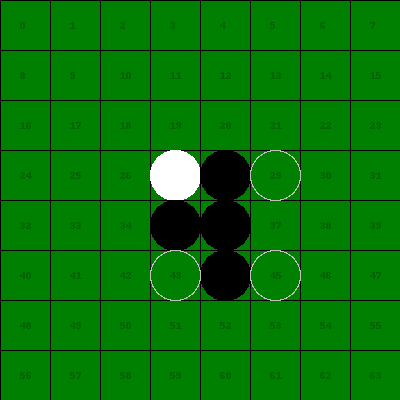

Jogadas válidas: [29, 43, 45]
29




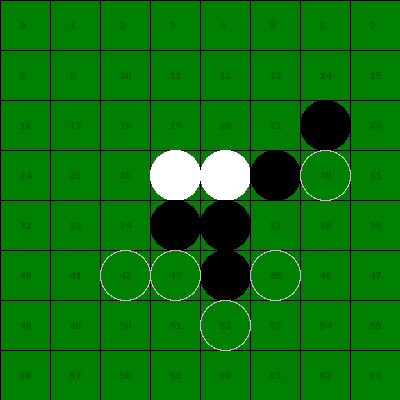

Jogadas válidas: [30, 42, 43, 45, 52]
52




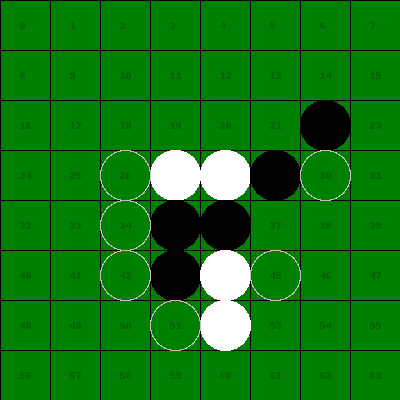

Jogadas válidas: [26, 30, 34, 42, 45, 51]
26




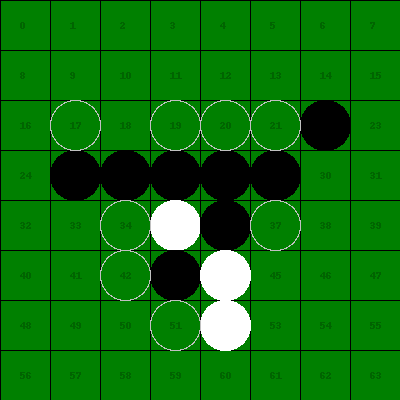

Jogadas válidas: [17, 19, 20, 21, 34, 37, 42, 51]
17




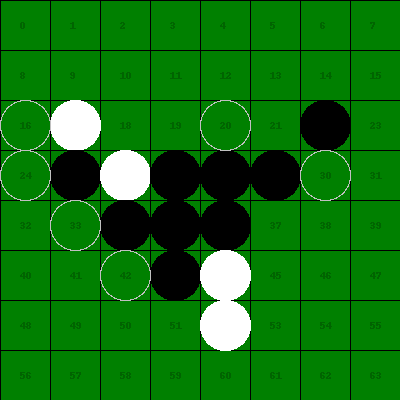

Jogadas válidas: [16, 20, 24, 30, 33, 42]
42




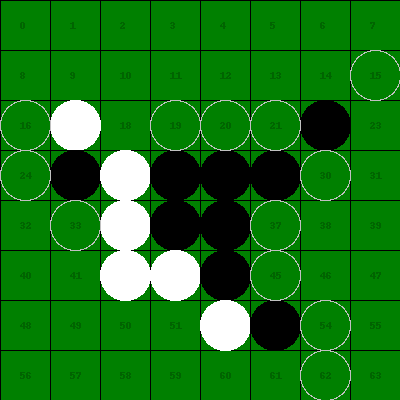

Jogadas válidas: [15, 16, 19, 20, 21, 24, 30, 33, 37, 45, 54, 62]
62




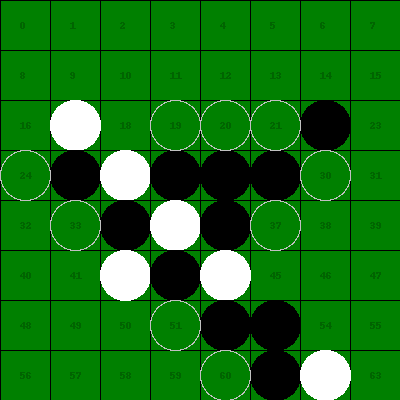

Jogadas válidas: [19, 20, 21, 24, 30, 33, 37, 51, 60]
51




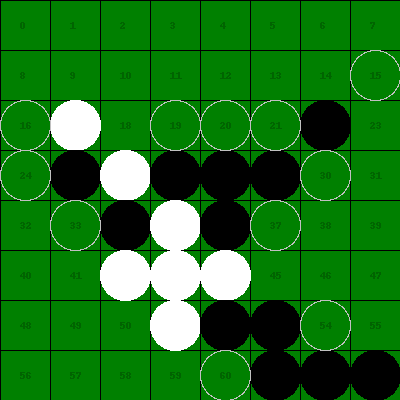

Jogadas válidas: [15, 16, 19, 20, 21, 24, 30, 33, 37, 54, 60]
15




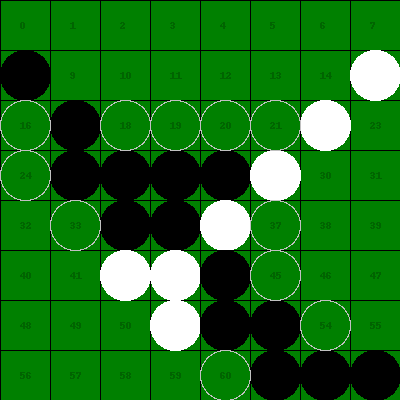

Jogadas válidas: [16, 18, 19, 20, 21, 24, 33, 37, 45, 54, 60]
16




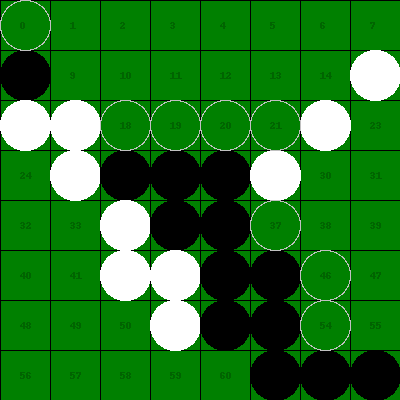

Jogadas válidas: [0, 18, 19, 20, 21, 37, 46, 54]
19




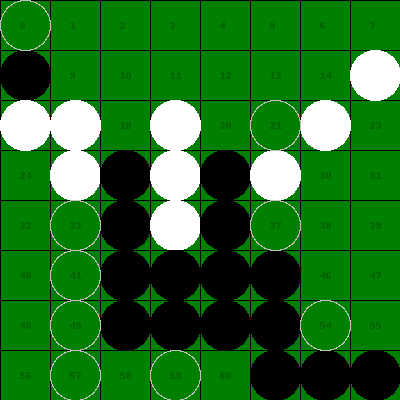

Jogadas válidas: [0, 21, 33, 37, 41, 49, 54, 57, 59]
21




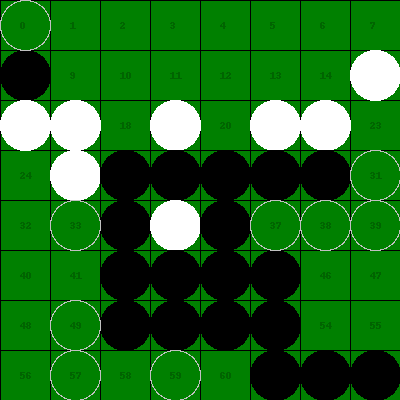

Jogadas válidas: [0, 31, 33, 37, 38, 39, 49, 57, 59]
31




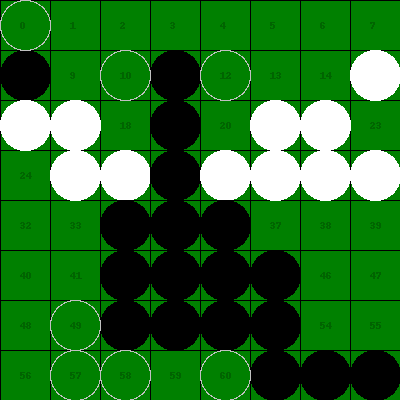

Jogadas válidas: [0, 10, 12, 49, 57, 58, 60]
12




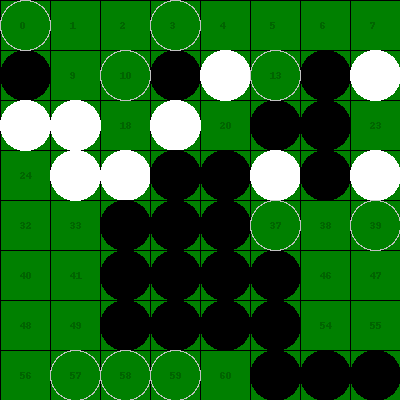

Jogadas válidas: [0, 3, 10, 13, 37, 39, 57, 58, 59]
10




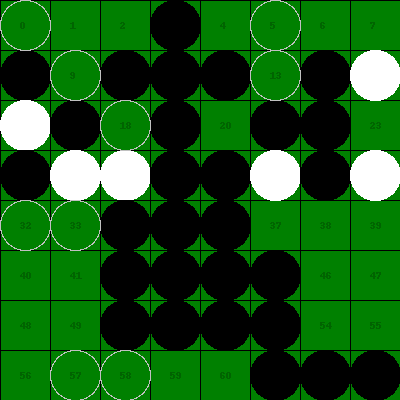

Jogadas válidas: [0, 5, 9, 13, 18, 32, 33, 57, 58]
57




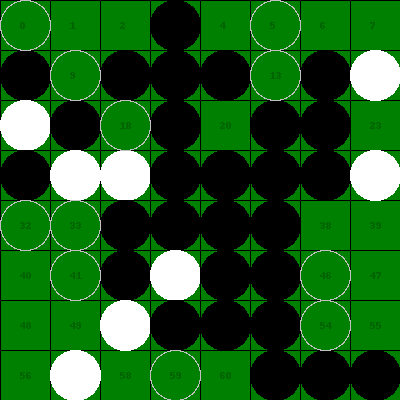

Jogadas válidas: [0, 5, 9, 13, 18, 32, 33, 41, 46, 54, 59]
59




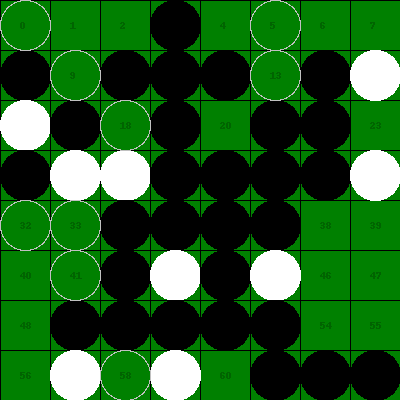

Jogadas válidas: [0, 5, 9, 13, 18, 32, 33, 41, 58]
18




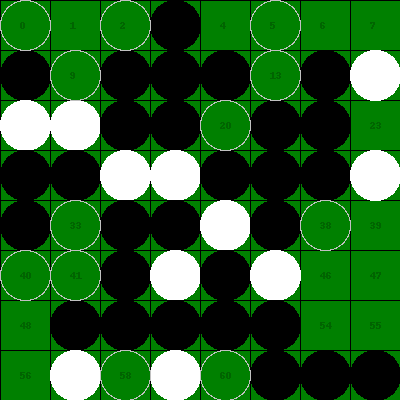

Jogadas válidas: [0, 2, 5, 9, 13, 20, 33, 38, 40, 41, 58, 60]
60




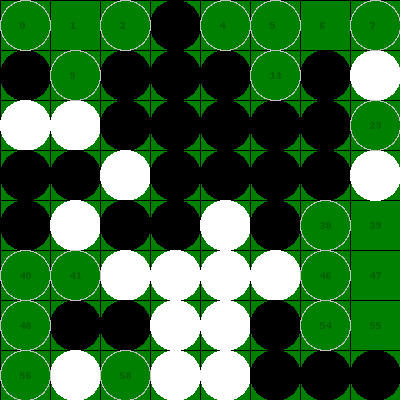

Jogadas válidas: [0, 2, 4, 5, 7, 9, 13, 23, 38, 40, 41, 46, 48, 54, 56, 58]
58




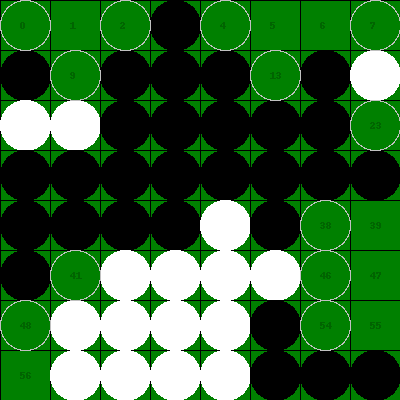

Jogadas válidas: [0, 2, 4, 7, 9, 13, 23, 38, 41, 46, 48, 54]
54




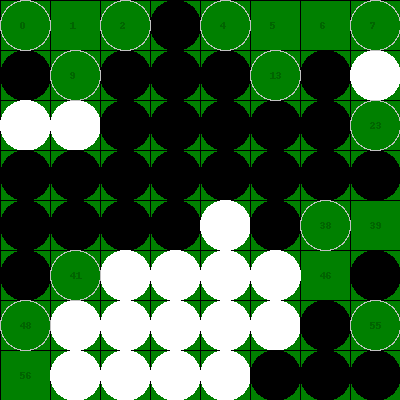

Jogadas válidas: [0, 2, 4, 7, 9, 13, 23, 38, 41, 48, 55]
55




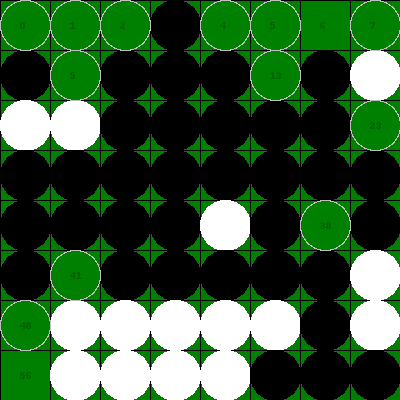

Jogadas válidas: [0, 1, 2, 4, 5, 7, 9, 13, 23, 38, 41, 48]
48




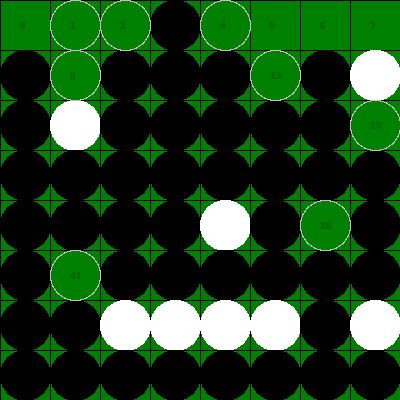

Jogadas válidas: [1, 2, 4, 9, 13, 23, 38, 41]
4




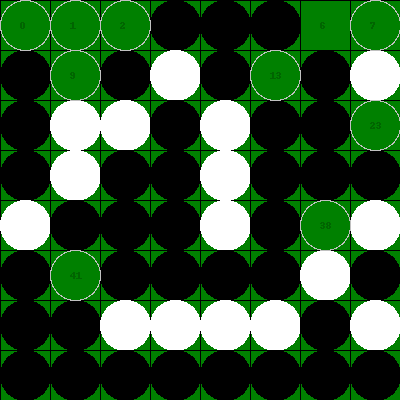

Jogadas válidas: [0, 1, 2, 7, 9, 13, 23, 38, 41]
41




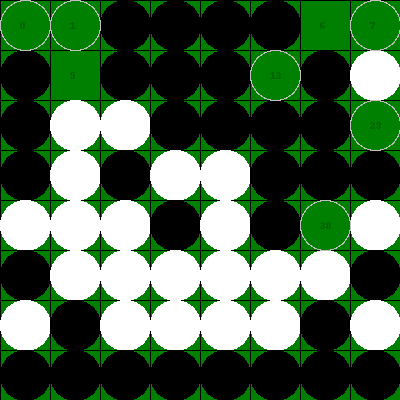

Jogadas válidas: [0, 1, 7, 13, 23, 38]
0




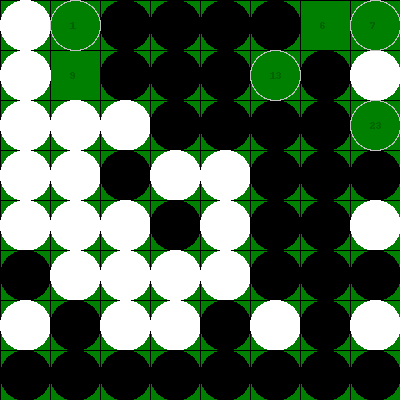

Jogadas válidas: [1, 7, 13, 23]
1




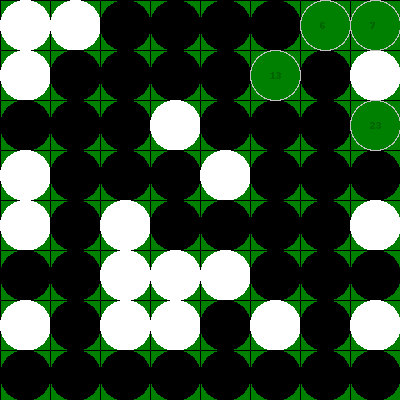

Jogadas válidas: [6, 7, 13, 23]
7




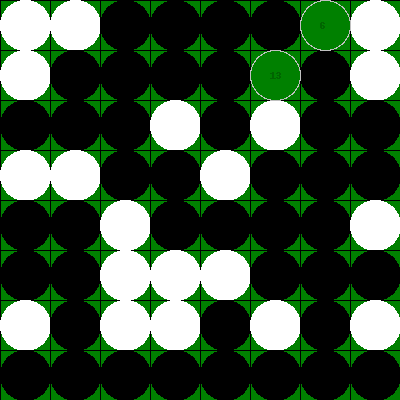

Jogadas válidas: [6, 13]
13
#========================================#

|        PERDEROLA... TRAIN MORE         |

#========================================#



In [ ]:
result, history = game(player_rl, human_player)

if result == -1 :
  print("#========================================#\n")
  print("|      CONGRATULATIONS, YOU GANHOLAS    |\n")
  print("#========================================#\n")

elif result == 1 :
  print("#========================================#\n")
  print("|        PERDEROLA... TRAIN MORE         |\n")
  print("#========================================#\n")

else:
  print("#===========================================================#            \n")
  print("|        QUE ORGULHO! VOCE NAO EMPATA, ASSIM COMO O APENDOLAS            \n")
  print("#===========================================================#            \n") 
